In [49]:
import pandas as pd 
import tensorflow as tf 
import numpy as np 
from tensorflow import keras
from keras import regularizers
from keras.layers import Dense,Conv2D,Flatten,Input,MaxPool2D
from matplotlib import pyplot as plt

In [50]:
data_dir = "../data/emnist-balanced-train.csv"

In [51]:
df = pd.read_csv(data_dir)
df.shape

(112799, 785)

In [52]:
labels = df['45']
df = df.drop('45',axis=1)
df = (df*1.0)/255

In [53]:
train = (np.array(df[:-20000]),labels[:-20000])
val= (np.array(df[-20000:-15000]),labels[-20000:-15000])
test= (np.array(df[-15000:]),labels[-15000:])

def get_img(arr):
	return np.array([np.reshape(arr[i] , [28,28,1]) for i in range(arr.shape[0])])

In [54]:
test[0].shape

(15000, 784)

In [55]:
train_img = (get_img(train[0]),train[1])
val_img = (get_img(val[0]),val[1])
test_img = (get_img(test[0]),test[1])

In [56]:
train[0].shape

(92799, 784)

In [57]:
storage = []
# storage.append([(model1,hist1),(model2,hist2),(model3,hist3)])

In [58]:
def run(model,train,val,test):

    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.legacy.Adam(0.00001),
                metrics=['accuracy'])

    model.summary()

    print("training")
    history = model.fit(train[0],train[1], validation_data=val, epochs=100, verbose=True)


    print("Testing")
    loss, accuracy = model.evaluate(test[0], test[1])
    print(loss , accuracy)

    return model,history


In [59]:
model1 = tf.keras.Sequential([
# Input(shape=[28,28,1]),
Input(shape=[784]),
Dense(10, activation = 'relu'),
Dense(5, activation = 'relu'),
Dense(2, activation = 'relu'),
Dense(47, activation = 'softmax'),
])

In [60]:
model2 = tf.keras.Sequential([
# Input(shape=[28,28,1]),
Input(shape=[784]),
Dense(100, activation = 'relu'),
Dense(50, activation = 'relu'),
Dense(20, activation = 'relu'),
Dense(47, activation = 'softmax'),
])



In [61]:
model3 = tf.keras.Sequential([
# Input(shape=[28,28,1]),
Input(shape=[784]),
Dense(1000, activation = 'relu'),
Dense(500, activation = 'relu'),
Dense(200, activation = 'relu'),
Dense(50, activation = 'relu'),
Dense(47, activation = 'softmax'),
])


In [62]:
# epochs 10 to 100
storage.append(run(model1,train,val,test))
storage.append(run(model2,train,val,test))
storage.append(run(model3,train,val,test))


Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_79 (Dense)            (None, 10)                7850      
                                                                 
 dense_80 (Dense)            (None, 5)                 55        
                                                                 
 dense_81 (Dense)            (None, 2)                 12        
                                                                 
 dense_82 (Dense)            (None, 47)                141       
                                                                 
Total params: 8,058
Trainable params: 8,058
Non-trainable params: 0
_________________________________________________________________
training
Epoch 1/100
2900/2900 [==============================] - 3s 1ms/step - loss: 3.8480 - accuracy: 0.0285 - val_loss: 3.8435 - val_accuracy: 0.0304
Epoch 2/100
2900/2900 [======

In [63]:

model4 = tf.keras.Sequential([
# Input(shape=[28,28,1]),
Input(shape=[784]),
Dense(10000, activation = 'relu'),
Dense(47, activation = 'softmax'),
])
# model4.summary()

In [64]:

model5 = tf.keras.Sequential([
# Input(shape=[28,28,1]),
Input(shape=[784]),
Dense(5000, activation = 'relu'),
Dense(1000, activation = 'relu'),
Dense(47, activation = 'softmax'),
])
# model5.summary()

In [65]:

storage.append(run(model4,train,val,test))
storage.append(run(model5,train,val,test))

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_92 (Dense)            (None, 10000)             7850000   
                                                                 
 dense_93 (Dense)            (None, 47)                470047    
                                                                 
Total params: 8,320,047
Trainable params: 8,320,047
Non-trainable params: 0
_________________________________________________________________
training
Epoch 1/100
2900/2900 [==============================] - 4s 1ms/step - loss: 1.9125 - accuracy: 0.5610 - val_loss: 1.3375 - val_accuracy: 0.6448
Epoch 2/100
2900/2900 [==============================] - 4s 1ms/step - loss: 1.2144 - accuracy: 0.6725 - val_loss: 1.1436 - val_accuracy: 0.6894
Epoch 3/100
2900/2900 [==============================] - 4s 1ms/step - loss: 1.0727 - accuracy: 0.7074 - val_loss: 1.0450 - val_accuracy: 0.

In [66]:

model6 = tf.keras.Sequential([
# Input(shape=[28,28,1]),
Input(shape=[784]),
Dense(4000, activation = 'relu'),
Dense(1000, activation = 'relu'),
Dense(800, activation = 'relu'),
Dense(200, activation = 'relu'),
Dense(47, activation = 'softmax'),
])
# model6.summary()


In [67]:

storage.append(run(model6,train,val,test))

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_97 (Dense)            (None, 4000)              3140000   
                                                                 
 dense_98 (Dense)            (None, 1000)              4001000   
                                                                 
 dense_99 (Dense)            (None, 800)               800800    
                                                                 
 dense_100 (Dense)           (None, 200)               160200    
                                                                 
 dense_101 (Dense)           (None, 47)                9447      
                                                                 
Total params: 8,111,447
Trainable params: 8,111,447
Non-trainable params: 0
_________________________________________________________________
training
Epoch 1/100
2900/2900 [===========

In [68]:

model7 = tf.keras.Sequential([
# Input(shape=[28,28,1]),
Input(shape=[784]),
Dense(4000, activation = 'relu',
kernel_regularizer=regularizers.L1(0.01),
      ),
Dense(1000, activation = 'relu'),
Dense(800, activation = 'relu'),
Dense(200, activation = 'relu',
kernel_regularizer=regularizers.L1(0.01),
      ),
Dense(47, activation = 'softmax'),
])

In [69]:

storage.append(run(model7,train,val,test))

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_102 (Dense)           (None, 4000)              3140000   
                                                                 
 dense_103 (Dense)           (None, 1000)              4001000   
                                                                 
 dense_104 (Dense)           (None, 800)               800800    
                                                                 
 dense_105 (Dense)           (None, 200)               160200    
                                                                 
 dense_106 (Dense)           (None, 47)                9447      
                                                                 
Total params: 8,111,447
Trainable params: 8,111,447
Non-trainable params: 0
_________________________________________________________________
training
Epoch 1/100
2900/2900 [===========

In [70]:

model8 = tf.keras.Sequential([
Input(shape=[28,28,1]),
# Input(shape=[784]),
Conv2D(filters=25,kernel_size=(3,3)),
Flatten(),
Dense(1000, activation = 'relu'),
Dense(800, activation = 'relu'),
Dense(200, activation = 'relu',
kernel_regularizer=regularizers.L1(0.01),
      ),
Dense(47, activation = 'softmax'),
])

In [71]:
storage.append(run(model8,train_img,val_img,test_img))

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_55 (Conv2D)          (None, 26, 26, 25)        250       
                                                                 
 flatten_14 (Flatten)        (None, 16900)             0         
                                                                 
 dense_107 (Dense)           (None, 1000)              16901000  
                                                                 
 dense_108 (Dense)           (None, 800)               800800    
                                                                 
 dense_109 (Dense)           (None, 200)               160200    
                                                                 
 dense_110 (Dense)           (None, 47)                9447      
                                                                 
Total params: 17,871,697
Trainable params: 17,871,697

In [72]:


model9 = tf.keras.Sequential([
Input(shape=[28,28,1]),
# Input(shape=[784]),
Conv2D(filters=25,kernel_size=(3,3)),
Conv2D(filters=15,kernel_size=(3,3)),
Conv2D(filters=5,kernel_size=(3,3)),
Flatten(),
Dense(1000, activation = 'relu'),
Dense(800, activation = 'relu'),
Dense(200, activation = 'relu',
kernel_regularizer=regularizers.L1(0.01),
      ),
Dense(47, activation = 'softmax'),
])

In [73]:

storage.append(run(model9,train_img,val_img,test_img))

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_56 (Conv2D)          (None, 26, 26, 25)        250       
                                                                 
 conv2d_57 (Conv2D)          (None, 24, 24, 15)        3390      
                                                                 
 conv2d_58 (Conv2D)          (None, 22, 22, 5)         680       
                                                                 
 flatten_15 (Flatten)        (None, 2420)              0         
                                                                 
 dense_111 (Dense)           (None, 1000)              2421000   
                                                                 
 dense_112 (Dense)           (None, 800)               800800    
                                                                 
 dense_113 (Dense)           (None, 200)             

2900/2900 [==============================] - 5s 2ms/step - loss: 46.7540 - accuracy: 0.5565 - val_loss: 33.9320 - val_accuracy: 0.6932
Epoch 2/100
2900/2900 [==============================] - 5s 2ms/step - loss: 26.2278 - accuracy: 0.7232 - val_loss: 20.1714 - val_accuracy: 0.7468
Epoch 3/100
2900/2900 [==============================] - 5s 2ms/step - loss: 16.7496 - accuracy: 0.7579 - val_loss: 14.3082 - val_accuracy: 0.7624
Epoch 4/100
2900/2900 [==============================] - 5s 2ms/step - loss: 12.7341 - accuracy: 0.7792 - val_loss: 11.4316 - val_accuracy: 0.7804
Epoch 5/100
2900/2900 [==============================] - 5s 2ms/step - loss: 10.3860 - accuracy: 0.7931 - val_loss: 9.5252 - val_accuracy: 0.7814
Epoch 6/100
2900/2900 [==============================] - 5s 2ms/step - loss: 8.7421 - accuracy: 0.8051 - val_loss: 8.1549 - val_accuracy: 0.7880
Epoch 7/100
2900/2900 [==============================] - 5s 2ms/step - loss: 7.5129 - accuracy: 0.8122 - val_loss: 7.0685 - val_accur

In [74]:

model10 = tf.keras.Sequential([
Input(shape=[28,28,1]),
# Input(shape=[784]),
Conv2D(filters=25,kernel_size=(3,3),padding="same"),
Conv2D(filters=25,kernel_size=(3,3),padding="same"),
MaxPool2D(),
Conv2D(filters=15,kernel_size=(3,3),padding="same"),
Conv2D(filters=15,kernel_size=(3,3),padding="same"),
MaxPool2D(),
Conv2D(filters=5,kernel_size=(3,3),padding="same"),
Conv2D(filters=5,kernel_size=(3,3),padding="same"),
MaxPool2D(),
Flatten(),
Dense(1000, activation = 'relu'),
Dense(800, activation = 'relu'),
Dense(200, activation = 'relu',
# kernel_regularizer=regularizers.L1(0.01),
      ),
Dense(47, activation = 'softmax'),
])

In [75]:
storage.append(run(model10,train_img,val_img,test_img))

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_59 (Conv2D)          (None, 28, 28, 25)        250       
                                                                 
 conv2d_60 (Conv2D)          (None, 28, 28, 25)        5650      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 14, 14, 25)       0         
 g2D)                                                            
                                                                 
 conv2d_61 (Conv2D)          (None, 14, 14, 15)        3390      
                                                                 
 conv2d_62 (Conv2D)          (None, 14, 14, 15)        2040      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 7, 7, 15)         0         
 g2D)                                                

In [76]:

model11 = tf.keras.Sequential([
Input(shape=[28,28,1]),
# Input(shape=[784]),
Conv2D(filters=25,kernel_size=(3,3),padding="same"),
Conv2D(filters=25,kernel_size=(3,3),padding="same"),
MaxPool2D(),
# Conv2D(filters=15,kernel_size=(3,3),padding="same"),
# Conv2D(filters=15,kernel_size=(3,3),padding="same"),
# MaxPool2D(),
# Conv2D(filters=5,kernel_size=(3,3),padding="same"),
# Conv2D(filters=5,kernel_size=(3,3),padding="same"),
# MaxPool2D(),
Flatten(),
Dense(1000, activation = 'relu'),
Dense(800, activation = 'relu'),
Dense(200, activation = 'relu',
# kernel_regularizer=regularizers.L1(0.01),
      ),
Dense(47, activation = 'softmax'),
])

In [77]:
storage.append(run(model11,train_img,val_img,test_img))

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_65 (Conv2D)          (None, 28, 28, 25)        250       
                                                                 
 conv2d_66 (Conv2D)          (None, 28, 28, 25)        5650      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 14, 14, 25)       0         
 g2D)                                                            
                                                                 
 flatten_17 (Flatten)        (None, 4900)              0         
                                                                 
 dense_119 (Dense)           (None, 1000)              4901000   
                                                                 
 dense_120 (Dense)           (None, 800)               800800    
                                                     

2900/2900 [==============================] - 5s 2ms/step - loss: 1.6794 - accuracy: 0.5640 - val_loss: 1.0505 - val_accuracy: 0.7022
Epoch 2/100
2900/2900 [==============================] - 5s 2ms/step - loss: 0.9232 - accuracy: 0.7287 - val_loss: 0.8262 - val_accuracy: 0.7526
Epoch 3/100
2900/2900 [==============================] - 5s 2ms/step - loss: 0.7618 - accuracy: 0.7702 - val_loss: 0.7177 - val_accuracy: 0.7822
Epoch 4/100
2900/2900 [==============================] - 5s 2ms/step - loss: 0.6678 - accuracy: 0.7946 - val_loss: 0.6669 - val_accuracy: 0.7976
Epoch 5/100
2900/2900 [==============================] - 5s 2ms/step - loss: 0.6056 - accuracy: 0.8113 - val_loss: 0.6323 - val_accuracy: 0.8016
Epoch 6/100
2900/2900 [==============================] - 5s 2ms/step - loss: 0.5589 - accuracy: 0.8235 - val_loss: 0.5727 - val_accuracy: 0.8168
Epoch 7/100
2900/2900 [==============================] - 5s 2ms/step - loss: 0.5228 - accuracy: 0.8328 - val_loss: 0.5758 - val_accuracy: 0.81

In [78]:

model12 = tf.keras.Sequential([
Input(shape=[28,28,1]),
# Input(shape=[784]),
Conv2D(filters=25,kernel_size=(3,3),padding="same"),
# Conv2D(filters=25,kernel_size=(3,3),padding="same"),
MaxPool2D(),
Conv2D(filters=15,kernel_size=(3,3),padding="same"),
# Conv2D(filters=15,kernel_size=(3,3),padding="same"),
MaxPool2D(),
Conv2D(filters=5,kernel_size=(3,3),padding="same"),
# Conv2D(filters=5,kernel_size=(3,3),padding="same"),
MaxPool2D(),
Flatten(),
Dense(1000, activation = 'relu'),
Dense(800, activation = 'relu'),
Dense(200, activation = 'relu',
# kernel_regularizer=regularizers.L1(0.01),
      ),
Dense(47, activation = 'softmax'),
])
storage.append(run(model12,train_img,val_img,test_img))

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_67 (Conv2D)          (None, 28, 28, 25)        250       
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 14, 14, 25)       0         
 g2D)                                                            
                                                                 
 conv2d_68 (Conv2D)          (None, 14, 14, 15)        3390      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 7, 7, 15)         0         
 g2D)                                                            
                                                                 
 conv2d_69 (Conv2D)          (None, 7, 7, 5)           680       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 3, 3, 5)        

2900/2900 [==============================] - 5s 2ms/step - loss: 2.7947 - accuracy: 0.3046 - val_loss: 1.8616 - val_accuracy: 0.4856
Epoch 2/100
2900/2900 [==============================] - 5s 2ms/step - loss: 1.6203 - accuracy: 0.5474 - val_loss: 1.4662 - val_accuracy: 0.5710
Epoch 3/100
2900/2900 [==============================] - 5s 2ms/step - loss: 1.3316 - accuracy: 0.6160 - val_loss: 1.2542 - val_accuracy: 0.6300
Epoch 4/100
2900/2900 [==============================] - 5s 2ms/step - loss: 1.1741 - accuracy: 0.6549 - val_loss: 1.1215 - val_accuracy: 0.6674
Epoch 5/100
2900/2900 [==============================] - 5s 2ms/step - loss: 1.0683 - accuracy: 0.6836 - val_loss: 1.0309 - val_accuracy: 0.6892
Epoch 6/100
2900/2900 [==============================] - 5s 2ms/step - loss: 0.9887 - accuracy: 0.7049 - val_loss: 0.9640 - val_accuracy: 0.7066
Epoch 7/100
2900/2900 [==============================] - 5s 2ms/step - loss: 0.9269 - accuracy: 0.7201 - val_loss: 0.9124 - val_accuracy: 0.71

In [79]:

model = tf.keras.Sequential([
Input(shape=[28,28,1]),
# Input(shape=[784]),
Conv2D(filters=25,kernel_size=(3,3),padding="same"),
Conv2D(filters=15,kernel_size=(3,3),padding="same"),
Conv2D(filters=5,kernel_size=(3,3),padding="same"),
MaxPool2D(),
Flatten(),
Dense(1000, activation = 'relu'),
Dense(800, activation = 'relu'),
Dense(200, activation = 'relu',
# kernel_regularizer=regularizers.L1(0.01),
      ),
Dense(47, activation = 'softmax'),
])
storage.append(run(model,train_img,val_img,test_img))

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_70 (Conv2D)          (None, 28, 28, 25)        250       
                                                                 
 conv2d_71 (Conv2D)          (None, 28, 28, 15)        3390      
                                                                 
 conv2d_72 (Conv2D)          (None, 28, 28, 5)         680       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 14, 14, 5)        0         
 g2D)                                                            
                                                                 
 flatten_19 (Flatten)        (None, 980)               0         
                                                                 
 dense_127 (Dense)           (None, 1000)              981000    
                                                     

2900/2900 [==============================] - 5s 2ms/step - loss: 1.7575 - accuracy: 0.5414 - val_loss: 1.0458 - val_accuracy: 0.6972
Epoch 2/100
2900/2900 [==============================] - 5s 2ms/step - loss: 0.9307 - accuracy: 0.7263 - val_loss: 0.8500 - val_accuracy: 0.7472
Epoch 3/100
2900/2900 [==============================] - 5s 2ms/step - loss: 0.7787 - accuracy: 0.7654 - val_loss: 0.7485 - val_accuracy: 0.7742
Epoch 4/100
2900/2900 [==============================] - 5s 2ms/step - loss: 0.6865 - accuracy: 0.7895 - val_loss: 0.6927 - val_accuracy: 0.7896
Epoch 5/100
2900/2900 [==============================] - 5s 2ms/step - loss: 0.6241 - accuracy: 0.8065 - val_loss: 0.6441 - val_accuracy: 0.8040
Epoch 6/100
2900/2900 [==============================] - 5s 2ms/step - loss: 0.5777 - accuracy: 0.8189 - val_loss: 0.6237 - val_accuracy: 0.8040
Epoch 7/100
2900/2900 [==============================] - 5s 2ms/step - loss: 0.5402 - accuracy: 0.8304 - val_loss: 0.5987 - val_accuracy: 0.81

In [80]:

model = tf.keras.Sequential([
Input(shape=[28,28,1]),
# Input(shape=[784]),
Conv2D(filters=25,kernel_size=(3,3),padding="same"),
Conv2D(filters=15,kernel_size=(3,3),padding="same"),
Conv2D(filters=5,kernel_size=(3,3),padding="same"),
MaxPool2D(),
Flatten(),
Dense(4000, activation = 'relu'),
Dense(1000, activation = 'relu'),
Dense(800, activation = 'relu'),
Dense(200, activation = 'relu',
kernel_regularizer=regularizers.L1(0.01),
      ),
Dense(47, activation = 'softmax'),
])
storage.append(run(model,train_img,val_img,test_img))

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_73 (Conv2D)          (None, 28, 28, 25)        250       
                                                                 
 conv2d_74 (Conv2D)          (None, 28, 28, 15)        3390      
                                                                 
 conv2d_75 (Conv2D)          (None, 28, 28, 5)         680       
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 14, 14, 5)        0         
 g2D)                                                            
                                                                 
 flatten_20 (Flatten)        (None, 980)               0         
                                                                 
 dense_131 (Dense)           (None, 4000)              3924000   
                                                     

training
Epoch 1/100
2900/2900 [==============================] - 7s 2ms/step - loss: 46.8715 - accuracy: 0.5815 - val_loss: 33.8826 - val_accuracy: 0.7140
Epoch 2/100
2900/2900 [==============================] - 7s 2ms/step - loss: 25.7677 - accuracy: 0.7492 - val_loss: 19.3709 - val_accuracy: 0.7582
Epoch 3/100
2900/2900 [==============================] - 6s 2ms/step - loss: 15.7352 - accuracy: 0.7872 - val_loss: 13.2395 - val_accuracy: 0.7852
Epoch 4/100
2900/2900 [==============================] - 6s 2ms/step - loss: 11.5956 - accuracy: 0.8081 - val_loss: 10.2550 - val_accuracy: 0.8034
Epoch 5/100
2900/2900 [==============================] - 6s 2ms/step - loss: 9.1519 - accuracy: 0.8233 - val_loss: 8.2637 - val_accuracy: 0.8156
Epoch 6/100
2900/2900 [==============================] - 6s 2ms/step - loss: 7.4303 - accuracy: 0.8338 - val_loss: 6.7938 - val_accuracy: 0.8256
Epoch 7/100
2900/2900 [==============================] - 6s 2ms/step - loss: 6.1594 - accuracy: 0.8419 - val_loss

In [81]:

model = tf.keras.Sequential([
Input(shape=[28,28,1]),
# Input(shape=[784]),
Conv2D(filters=25,kernel_size=(3,3),padding="same"),
Conv2D(filters=15,kernel_size=(3,3),padding="same"),
Conv2D(filters=5,kernel_size=(3,3),padding="same"),
MaxPool2D(),
Flatten(),
Dense(4000, activation = 'relu',
# kernel_regularizer=regularizers.L1(0.01),
        ),
Dense(1000, activation = 'relu',
# kernel_regularizer=regularizers.L1(0.01),
	  ),
Dense(800, activation = 'relu',
kernel_regularizer=regularizers.L1(0.01),
	  ),
Dense(200, activation = 'relu',
kernel_regularizer=regularizers.L1(0.01),
      ),
Dense(47, activation = 'softmax'),
])
storage.append(run(model,train_img,val_img,test_img))

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_76 (Conv2D)          (None, 28, 28, 25)        250       


                                                                 
 conv2d_77 (Conv2D)          (None, 28, 28, 15)        3390      
                                                                 
 conv2d_78 (Conv2D)          (None, 28, 28, 5)         680       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 14, 14, 5)        0         
 g2D)                                                            
                                                                 
 flatten_21 (Flatten)        (None, 980)               0         
                                                                 
 dense_136 (Dense)           (None, 4000)              3924000   
                                                                 
 dense_137 (Dense)           (None, 1000)              4001000   
                                                                 
 dense_138 (Dense)           (None, 800)               800800    
          

In [82]:

model = tf.keras.Sequential([
Input(shape=[28,28,1]),
# Input(shape=[784]),
Conv2D(filters=25,kernel_size=(3,3),padding="same"),
Conv2D(filters=25,kernel_size=(3,3),padding="same"),
Conv2D(filters=25,kernel_size=(3,3),padding="same"),
MaxPool2D(),
Flatten(),
Dense(1000, activation = 'relu'),
Dense(800, activation = 'relu'),
Dense(200, activation = 'relu',
# kernel_regularizer=regularizers.L1(0.01),
      ),
Dense(47, activation = 'softmax'),
])
storage.append(run(model,train_img,val_img,test_img))

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_79 (Conv2D)          (None, 28, 28, 25)        250       
                                                                 
 conv2d_80 (Conv2D)          (None, 28, 28, 25)        5650      
                                                                 
 conv2d_81 (Conv2D)          (None, 28, 28, 25)        5650      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 14, 14, 25)       0         
 g2D)                                                            
                                                                 
 flatten_22 (Flatten)        (None, 4900)              0         
                                                                 
 dense_141 (Dense)           (None, 1000)              4901000   
                                                     

training
Epoch 1/100
2900/2900 [==============================] - 6s 2ms/step - loss: 1.5625 - accuracy: 0.5910 - val_loss: 0.9715 - val_accuracy: 0.7156
Epoch 2/100
2900/2900 [==============================] - 6s 2ms/step - loss: 0.8453 - accuracy: 0.7498 - val_loss: 0.7972 - val_accuracy: 0.7664
Epoch 3/100
2900/2900 [==============================] - 6s 2ms/step - loss: 0.7031 - accuracy: 0.7841 - val_loss: 0.6871 - val_accuracy: 0.7880
Epoch 4/100
2900/2900 [==============================] - 6s 2ms/step - loss: 0.6170 - accuracy: 0.8077 - val_loss: 0.6457 - val_accuracy: 0.8070
Epoch 5/100
2900/2900 [==============================] - 6s 2ms/step - loss: 0.5582 - accuracy: 0.8240 - val_loss: 0.6084 - val_accuracy: 0.8118
Epoch 6/100
2900/2900 [==============================] - 6s 2ms/step - loss: 0.5100 - accuracy: 0.8361 - val_loss: 0.5721 - val_accuracy: 0.8162
Epoch 7/100
2900/2900 [==============================] - 6s 2ms/step - loss: 0.4752 - accuracy: 0.8460 - val_loss: 0.5458

In [83]:

model = tf.keras.Sequential([
# Input(shape=[28,28,1]),
Input(shape=[784]),
# Conv2D(filters=25,kernel_size=(3,3),padding="same"),
# Conv2D(filters=15,kernel_size=(3,3),padding="same"),
# Conv2D(filters=5,kernel_size=(3,3),padding="same"),
# MaxPool2D(),
# Flatten(),
Dense(1000, activation = 'relu'),
Dense(800, activation = 'relu'),
Dense(200, activation = 'relu',
# kernel_regularizer=regularizers.L1(0.01),
      ),
Dense(47, activation = 'softmax'),
])
storage.append(run(model,train,val,test))

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_145 (Dense)           (None, 1000)              785000    
                                                                 
 dense_146 (Dense)           (None, 800)               800800    
                                                                 
 dense_147 (Dense)           (None, 200)               160200    
                                                                 
 dense_148 (Dense)           (None, 47)                9447      
                                                                 
Total params: 1,755,447
Trainable params: 1,755,447
Non-trainable params: 0
_________________________________________________________________
training


Epoch 1/100
2900/2900 [==============================] - 3s 1ms/step - loss: 2.3382 - accuracy: 0.4536 - val_loss: 1.4756 - val_accuracy: 0.6134
Epoch 2/100
2900/2900 [==============================] - 3s 1ms/step - loss: 1.3078 - accuracy: 0.6449 - val_loss: 1.2050 - val_accuracy: 0.6710
Epoch 3/100
2900/2900 [==============================] - 3s 1ms/step - loss: 1.1291 - accuracy: 0.6869 - val_loss: 1.0860 - val_accuracy: 0.6966
Epoch 4/100
2900/2900 [==============================] - 3s 1ms/step - loss: 1.0249 - accuracy: 0.7125 - val_loss: 0.9992 - val_accuracy: 0.7246
Epoch 5/100
2900/2900 [==============================] - 3s 1ms/step - loss: 0.9464 - accuracy: 0.7324 - val_loss: 0.9419 - val_accuracy: 0.7368
Epoch 6/100
2900/2900 [==============================] - 3s 1ms/step - loss: 0.8840 - accuracy: 0.7472 - val_loss: 0.8799 - val_accuracy: 0.7518
Epoch 7/100
2900/2900 [==============================] - 3s 1ms/step - loss: 0.8306 - accuracy: 0.7603 - val_loss: 0.8411 - val_ac

In [103]:
a = labels
hot_labels = np.zeros((a.size, a.max() + 1))
hot_labels[np.arange(a.size), a] = 1

In [104]:
hot_train = (np.array(df[:-20000]),hot_labels[:-20000])
hot_val= (np.array(df[-20000:-15000]),hot_labels[-20000:-15000])
hot_test= (np.array(df[-15000:]),hot_labels[-15000:])

In [105]:

model = tf.keras.Sequential([
# Input(shape=[28,28,1]),
Input(shape=[784]),
# Conv2D(filters=25,kernel_size=(3,3),padding="same"),
# Conv2D(filters=15,kernel_size=(3,3),padding="same"),
# Conv2D(filters=5,kernel_size=(3,3),padding="same"),
# MaxPool2D(),
# Flatten(),
Dense(4000, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
Dense(1000, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
Dense(800, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
Dense(200, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
Dense(47, activation = 'tanh'),
])

def temp_run(model,train,val,test):

    model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.legacy.Adam(0.00001),
                metrics=['accuracy'])

    model.summary()

    print("training")
    history = model.fit(train[0],train[1], validation_data=val, epochs=100, verbose=True)


    print("Testing")
    loss, accuracy = model.evaluate(test[0], test[1])
    print(loss , accuracy)

    return model,history

storage.append(temp_run(model,hot_train,hot_val,hot_test))

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_149 (Dense)           (None, 4000)              3140000   
                                                                 
 dense_150 (Dense)           (None, 1000)              4001000   
                                                                 
 dense_151 (Dense)           (None, 800)               800800    
                                                                 
 dense_152 (Dense)           (None, 200)               160200    
                                                                 
 dense_153 (Dense)           (None, 47)                9447      
                                                                 
Total params: 8,111,447
Trainable params: 8,111,447
Non-trainable params: 0
_________________________________________________________________


training
Epoch 1/100
2900/2900 [==============================] - 5s 2ms/step - loss: 0.0159 - accuracy: 0.5944 - val_loss: 0.0133 - val_accuracy: 0.7066
Epoch 2/100
2900/2900 [==============================] - 4s 1ms/step - loss: 0.0120 - accuracy: 0.7432 - val_loss: 0.0112 - val_accuracy: 0.7500
Epoch 3/100
2900/2900 [==============================] - 4s 1ms/step - loss: 0.0103 - accuracy: 0.7797 - val_loss: 0.0100 - val_accuracy: 0.7726
Epoch 4/100
2900/2900 [==============================] - 4s 1ms/step - loss: 0.0093 - accuracy: 0.8024 - val_loss: 0.0092 - val_accuracy: 0.7904
Epoch 5/100
2900/2900 [==============================] - 4s 1ms/step - loss: 0.0085 - accuracy: 0.8183 - val_loss: 0.0086 - val_accuracy: 0.8004
Epoch 6/100
2900/2900 [==============================] - 4s 1ms/step - loss: 0.0078 - accuracy: 0.8309 - val_loss: 0.0081 - val_accuracy: 0.8090
Epoch 7/100
2900/2900 [==============================] - 4s 1ms/step - loss: 0.0073 - accuracy: 0.8421 - val_loss: 0.0078

In [109]:

model = tf.keras.Sequential([
# Input(shape=[28,28,1]),
Input(shape=[784]),
# Conv2D(filters=25,kernel_size=(3,3),padding="same"),
# Conv2D(filters=15,kernel_size=(3,3),padding="same"),
# Conv2D(filters=5,kernel_size=(3,3),padding="same"),
# MaxPool2D(),
# Flatten(),
Dense(4000, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
Dense(1000, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
Dense(800, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
Dense(200, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
Dense(47, activation = 'tanh'),
])

def temp_run(model,train,val,test):

    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                optimizer=tf.keras.optimizers.legacy.Adam(0.00001),
                metrics=['accuracy'])

    model.summary()

    print("training")
    history = model.fit(train[0],train[1], validation_data=val, epochs=100, verbose=True)


    print("Testing")
    loss, accuracy = model.evaluate(test[0], test[1])
    print(loss , accuracy)

    return model,history

storage.append(temp_run(model,hot_train,hot_val,hot_test))

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_169 (Dense)           (None, 4000)              3140000   
                                                                 
 dense_170 (Dense)           (None, 1000)              4001000   
                                                                 
 dense_171 (Dense)           (None, 800)               800800    
                                                                 
 dense_172 (Dense)           (None, 200)               160200    
                                                                 
 dense_173 (Dense)           (None, 47)                9447      
                                                                 
Total params: 8,111,447
Trainable params: 8,111,447
Non-trainable params: 0
_________________________________________________________________
training
Epoch 1/100
2900/2900 [===========

KeyboardInterrupt: 

In [84]:

np.unique(labels,return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 array([2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400,
        2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400,
        2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400,
        2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400,
        2400, 2399, 2400]))

In [85]:
def pjt(history):
	plt.figure(0)
	plt.plot(history.history['accuracy'])
	plt.plot(history.history['val_accuracy'])
	plt.title('model accuracy')
	plt.ylabel('accuracy')
	plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper left')
	plt.show()
	plt.plot(history.history['loss'])
	plt.plot(history.history['val_loss'])
	plt.title('model loss')
	plt.ylabel('loss')
	plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper left')
	plt.show()

Printing for Model-1----


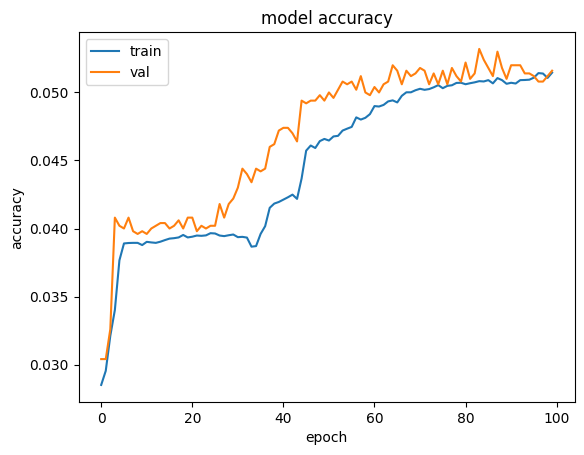

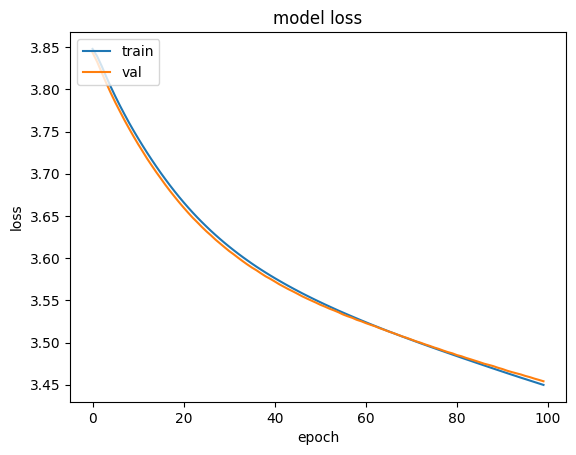

Printing for Model-2----


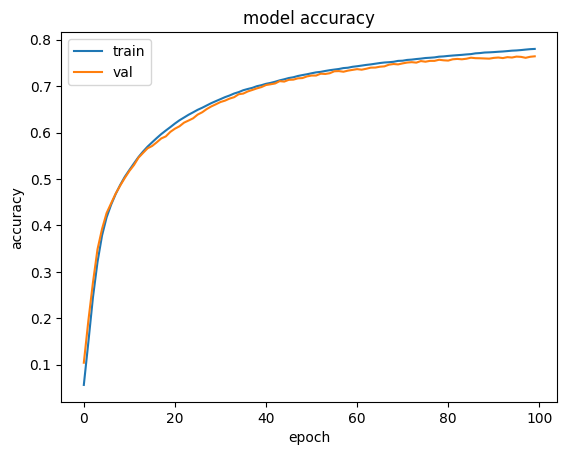

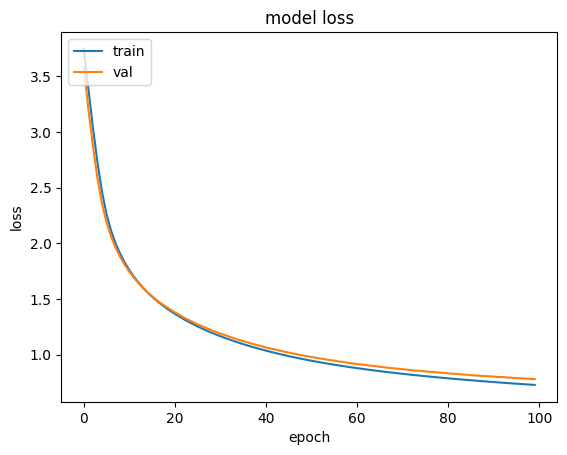

Printing for Model-3----


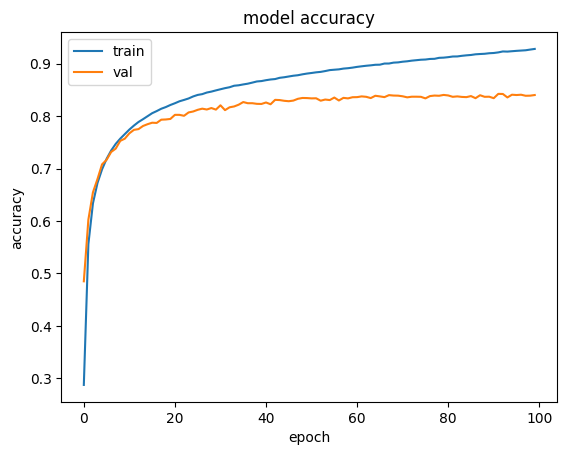

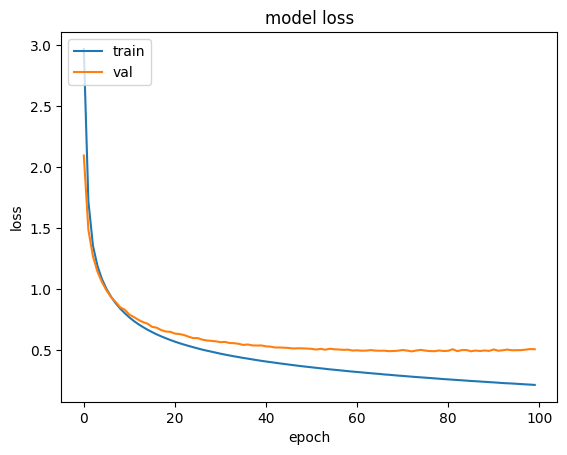

Printing for Model-4----


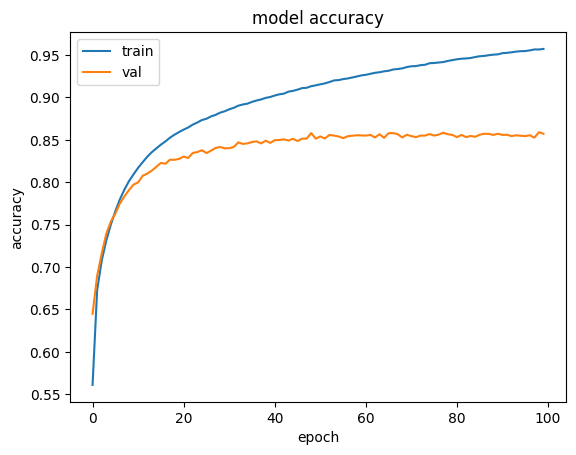

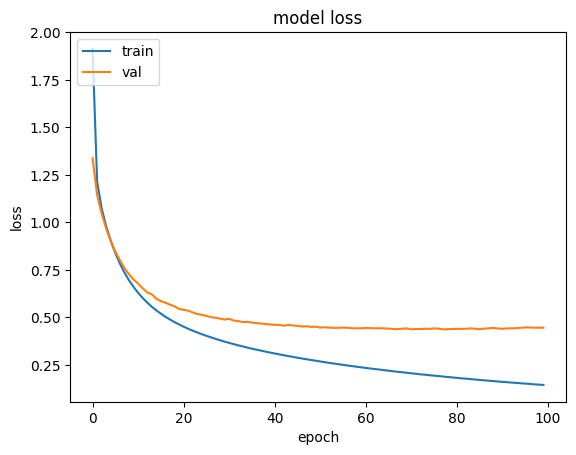

Printing for Model-5----


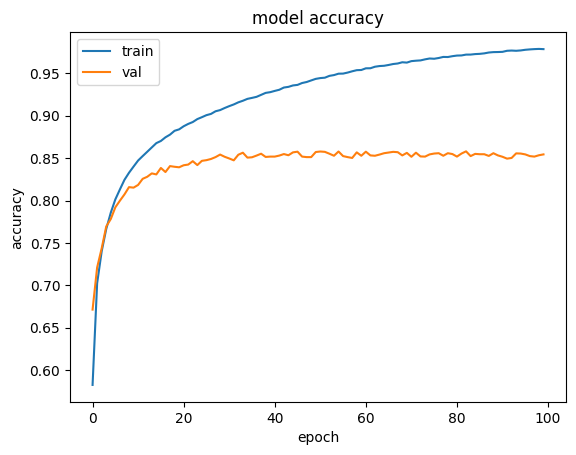

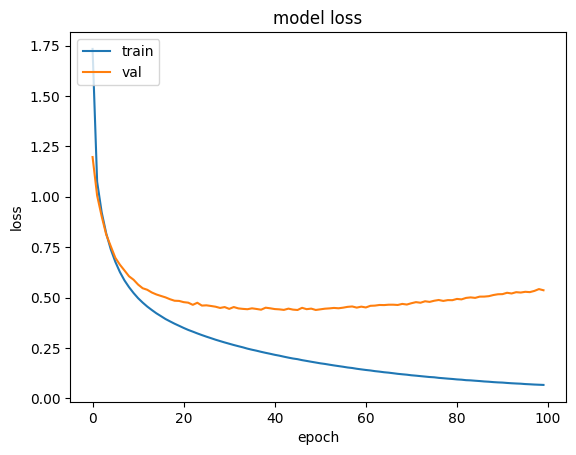

Printing for Model-6----


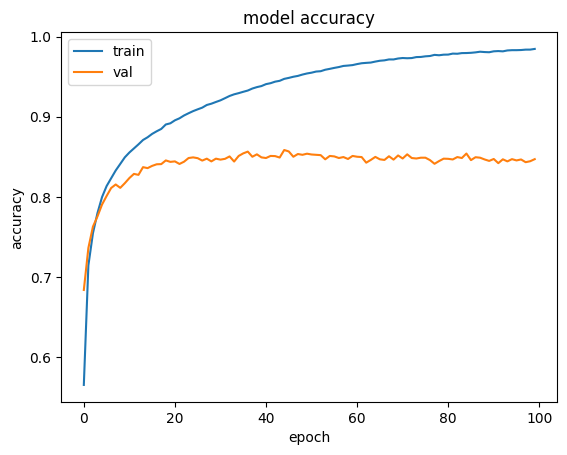

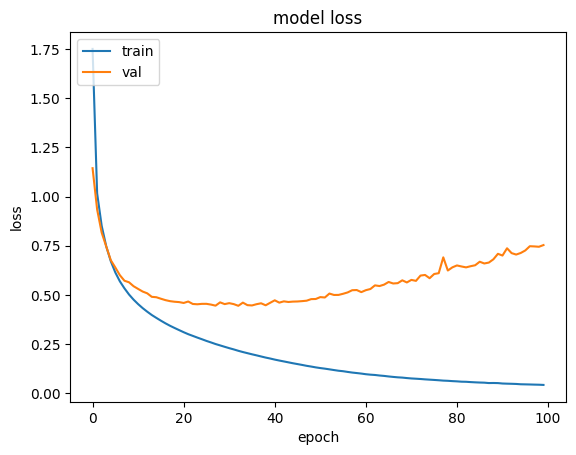

Printing for Model-7----


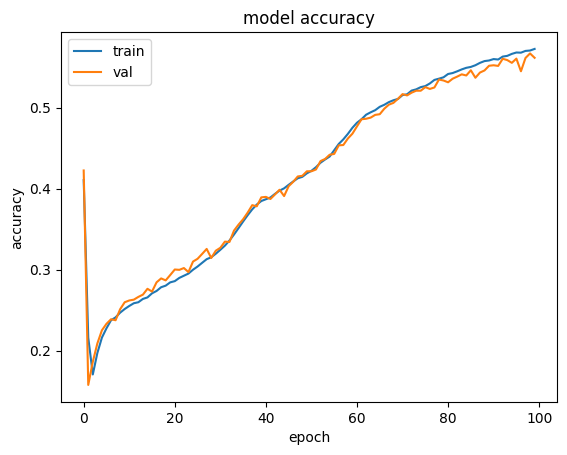

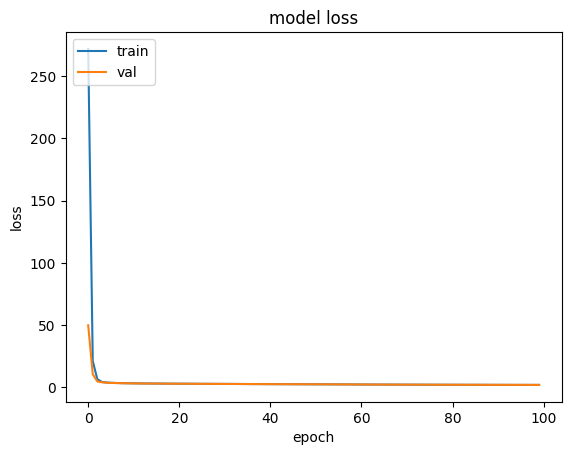

Printing for Model-8----


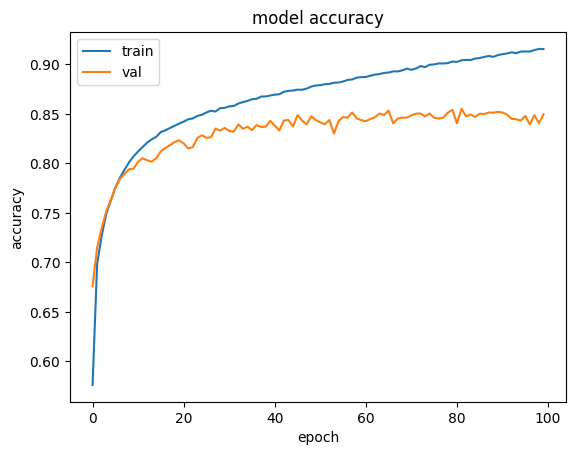

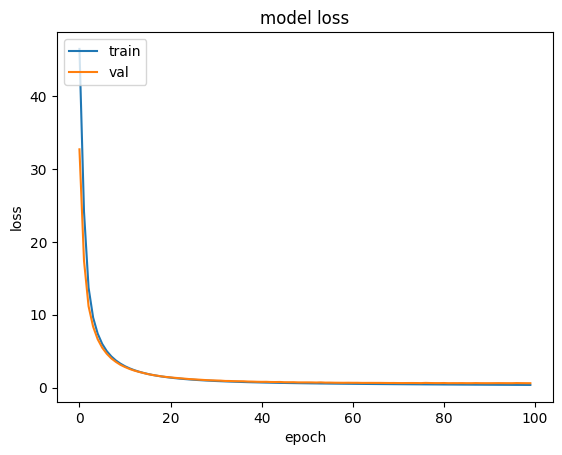

Printing for Model-9----


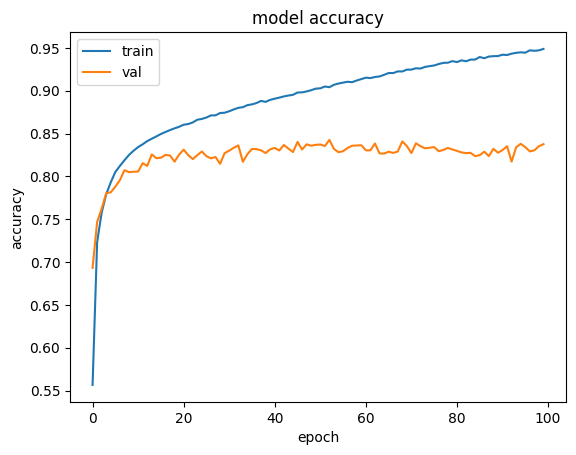

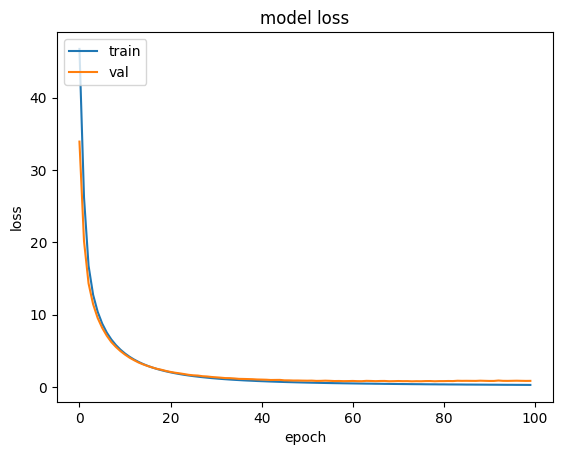

Printing for Model-10----


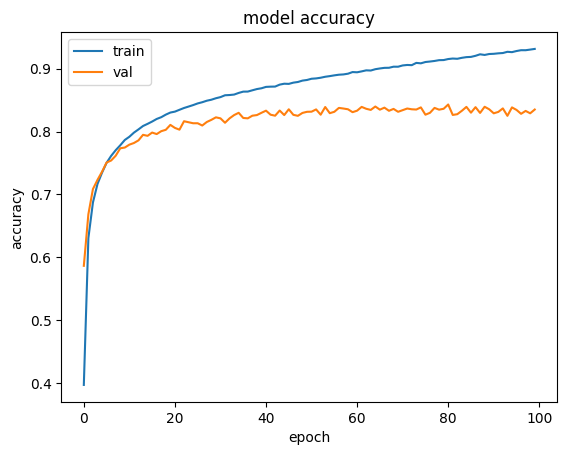

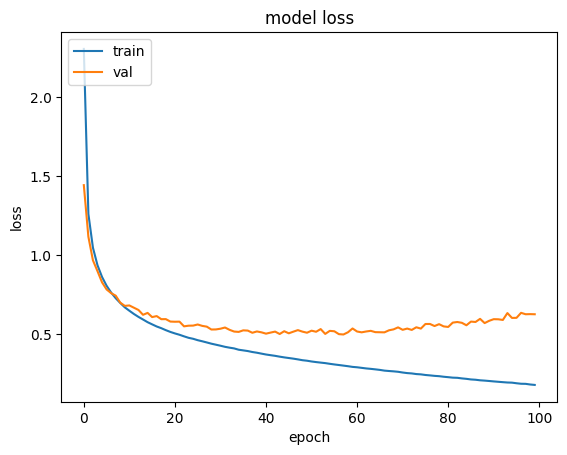

Printing for Model-11----


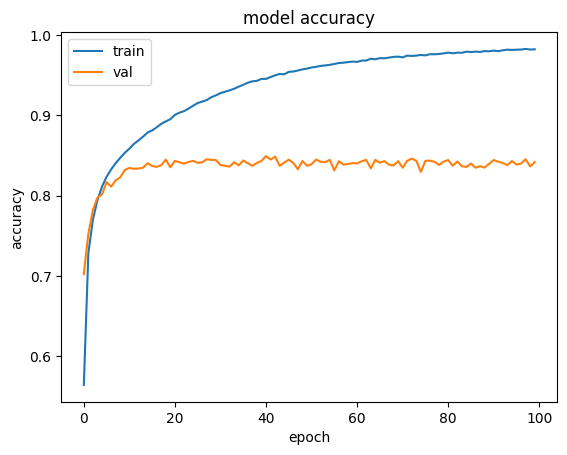

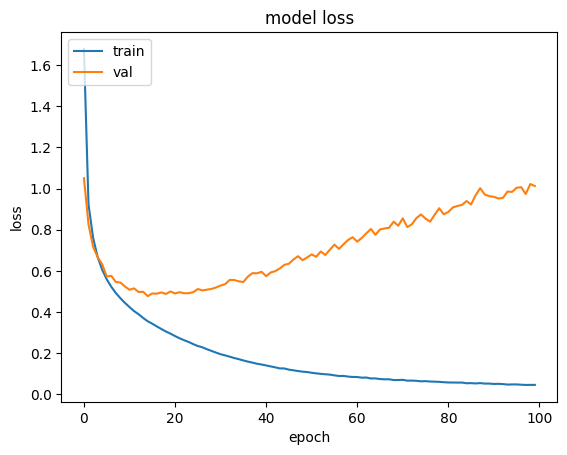

Printing for Model-12----


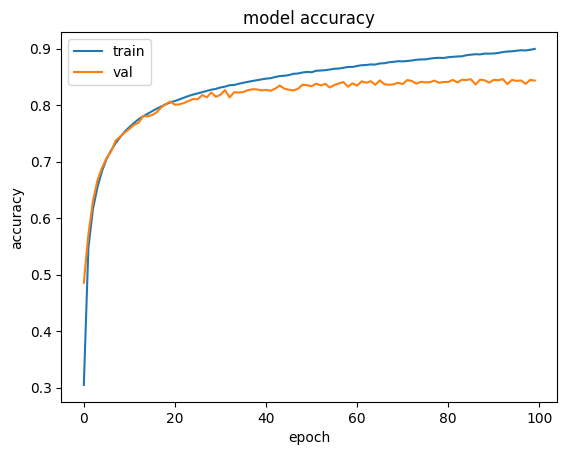

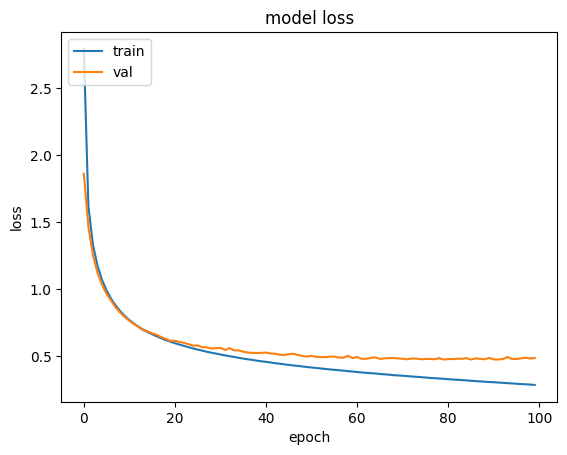

Printing for Model-13----


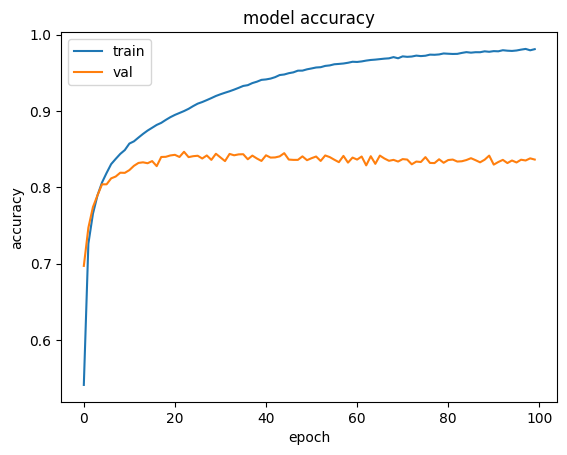

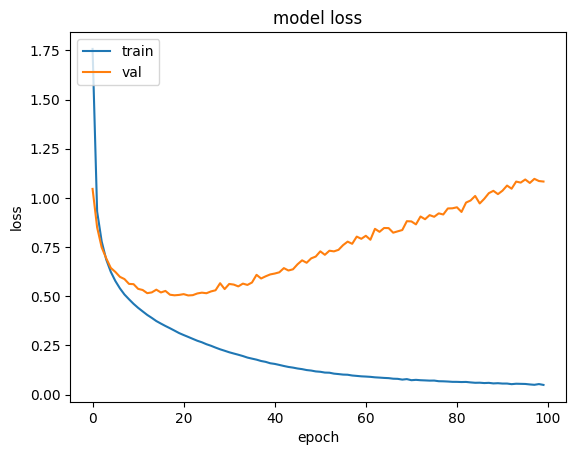

Printing for Model-14----


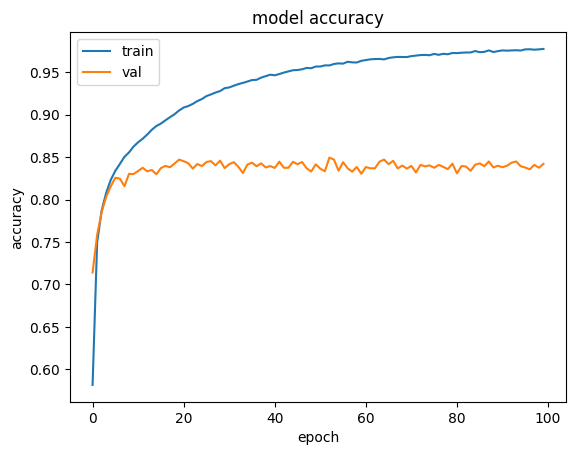

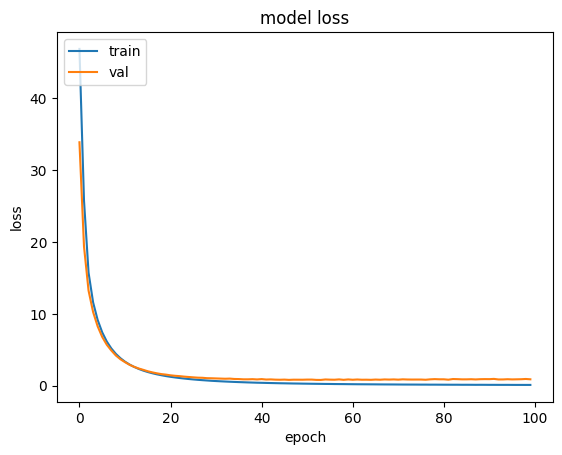

Printing for Model-15----


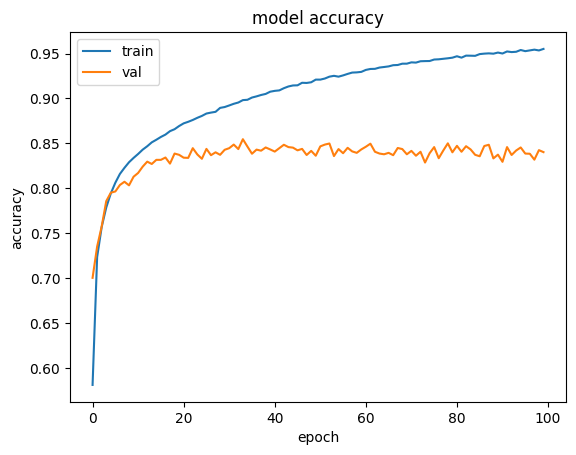

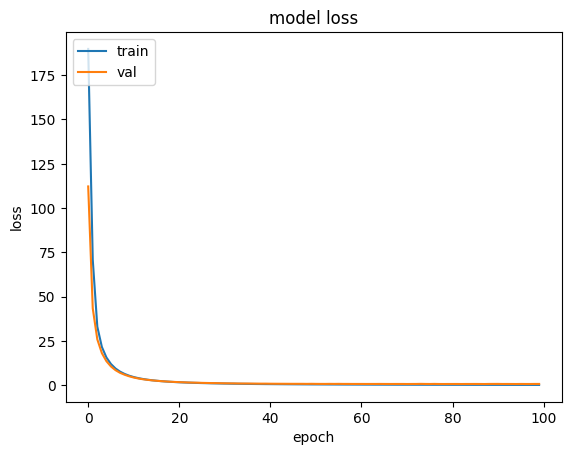

Printing for Model-16----


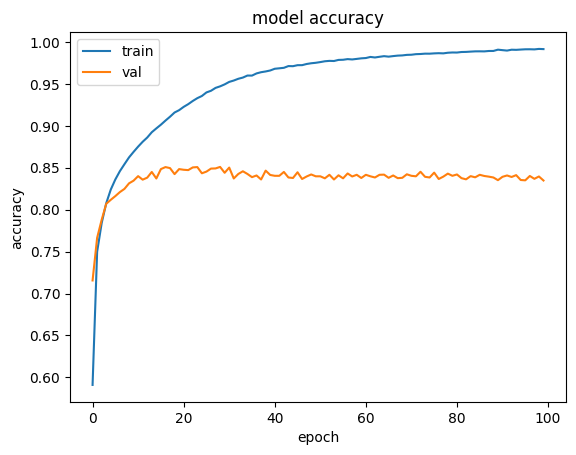

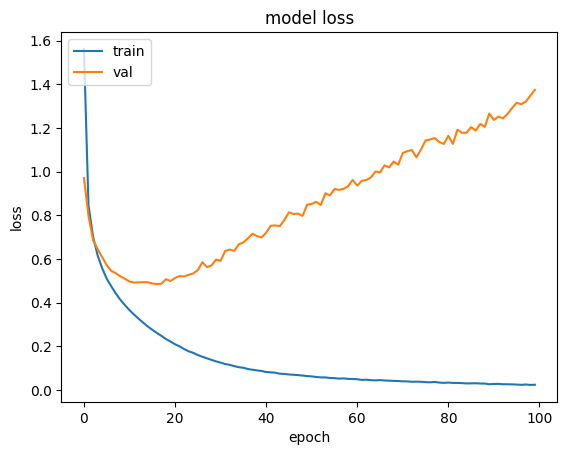

Printing for Model-17----


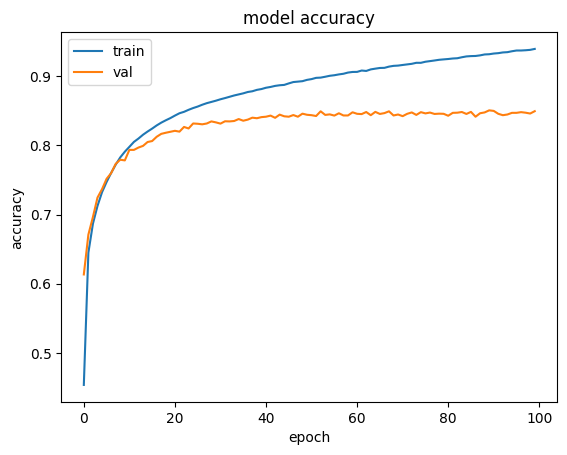

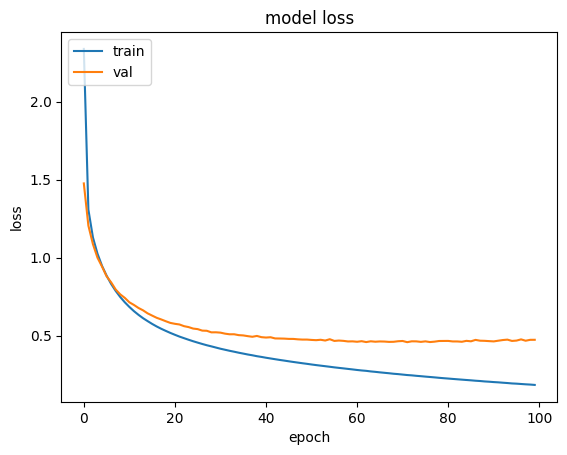

In [86]:
for i in range(len(storage)):
	print("Printing for Model-"+str(i+1)+"----")
	pjt(storage[i][1])


In [87]:


# model = tf.keras.Sequential([
# # Input(shape=[28,28,1]),
# Input(shape=[784]),
# # Conv2D(filters=25,kernel_size=(3,3),padding="same"),
# # Conv2D(filters=15,kernel_size=(3,3),padding="same"),
# # Conv2D(filters=5,kernel_size=(3,3),padding="same"),
# # MaxPool2D(),
# # Flatten(),
# Dense(1000, activation = 'relu'),
# Dense(800, activation = 'relu'),
# Dense(200, activation = 'relu',
# # kernel_regularizer=regularizers.L1(0.01),
#       ),
# Dense(47, activation = 'softmax'),
# ])
# storage.append(run(model,train,val,test))

In [92]:
storage[0][0].save("sdfd")

INFO:tensorflow:Assets written to: sdfd/assets


In [94]:
for i in range(len(storage)):
	storage[i][0].save("trained_model/Model"+str(i)+".keras")
